<h1>실습 1</h1>

In [71]:
import pandas as pd
from sklearn.preprocessing import *

In [72]:
x_train = pd.DataFrame(['남','여','남','남','여','여'])

x_train.head()

,0
0,남
1,여
2,남
3,남
4,여


In [10]:
#레이블 인코더 생성
encoing = LabelEncoder()
# x_train 데이터를 이용하여 피팅하고 레이블 숫자로 변환
encoing.fit(x_train['성별'])
x_train["성별_인코딩"]= encoing.transform(x_train['성별'])

In [11]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   성별      7 non-null      object
 1   성별_인코딩  7 non-null      int32 
dtypes: int32(1), object(1)
memory usage: 212.0+ bytes


In [12]:
x_train['성별'].value_counts()

남    4
여    3
Name: 성별, dtype: int64

In [13]:
#인코딩 체크
x_train

,성별,성별_인코딩
0,남,0
1,여,1
2,남,0
3,여,1
4,남,0
5,남,0
6,여,1


In [15]:
print(list(encoing.classes_))
print(list(encoing.inverse_transform([1,0])))

['남', '여']
['여', '남']


In [16]:
x_train.head(2)

,성별,성별_인코딩
0,남,0
1,여,1


In [17]:
#원 핫코딩 생성
one_encoding = OneHotEncoder(sparse=False)
#X_train 데이터를 이용하여 피팅
one_encoding.fit(x_train[['성별']])
# 가변환값 변환
one_encoding.transform(x_train[['성별']])
#one_encoding.fit_transform(x_train[['성별']])

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [21]:
print(one_encoding.get_feature_names())

['x0_남' 'x0_여']


In [26]:
x_train_one = pd.DataFrame(one_encoding.transform(x_train[['성별']]),columns=['성별0','성별1'])

In [27]:
x_train=pd.concat([x_train,x_train_one],axis =1)

In [29]:
x_train.head()

,성별,성별_인코딩,성별0,성별1
0,남,0,1.0,0.0
1,여,1,0.0,1.0
2,남,0,1.0,0.0
3,여,1,0.0,1.0
4,남,0,1.0,0.0


In [30]:
from sklearn.feature_extraction.text import *

In [31]:
corpus=['청년 인재 개발 양성 과정','인공지능 청년 양성 과정','미래 인공지능 데이터 대한민국','데이터 원유 기술사 청년 개발']

In [32]:
corpus

['청년 인재 개발 양성 과정', '인공지능 청년 양성 과정', '미래 인공지능 데이터 대한민국', '데이터 원유 기술사 청년 개발']

In [34]:
type(corpus)

list

In [37]:
count_vect = CountVectorizer()
count_vect.fit(corpus)
count_vect.vocabulary_

{'청년': 10,
 '인재': 9,
 '개발': 0,
 '양성': 6,
 '과정': 1,
 '인공지능': 8,
 '미래': 5,
 '데이터': 4,
 '대한민국': 3,
 '원유': 7,
 '기술사': 2}

In [39]:
count_vect.transform(corpus).toarray()

array([[1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]], dtype=int64)

In [40]:
features = count_vect.transform(corpus)

In [41]:
features

<4x11 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [55]:
vocab = count_vect.get_feature_names()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [56]:
vocab

['개발', '과정', '기술사', '대한민국', '데이터', '미래', '양성', '원유', '인공지능', '인재', '청년']

In [50]:
DTM = pd.DataFrame(features.toarray(), columns = vocab).head()

In [51]:
DTM

,개발,과정,기술사,대한민국,데이터,미래,양성,원유,인공지능,인재,청년
0,1,1,0,0,0,0,1,0,0,1,1
1,0,1,0,0,0,0,1,0,1,0,1
2,0,0,0,1,1,1,0,0,1,0,0
3,1,0,1,0,1,0,0,1,0,0,1


In [57]:
corpus

['청년 인재 개발 양성 과정', '인공지능 청년 양성 과정', '미래 인공지능 데이터 대한민국', '데이터 원유 기술사 청년 개발']

In [62]:
#TF-IDF 벡터라이저 생성
tfid = TfidfVectorizer()

tfid.fit(corpus)
tfid.vocabulary_

{'청년': 10,
 '인재': 9,
 '개발': 0,
 '양성': 6,
 '과정': 1,
 '인공지능': 8,
 '미래': 5,
 '데이터': 4,
 '대한민국': 3,
 '원유': 7,
 '기술사': 2}

In [63]:
tfid.transform(corpus).toarray()

array([[0.43584673, 0.43584673, 0.        , 0.        , 0.        ,
        0.        , 0.43584673, 0.        , 0.        , 0.55281632,
        0.35285549],
       [0.        , 0.52303503, 0.        , 0.        , 0.        ,
        0.        , 0.52303503, 0.        , 0.52303503, 0.        ,
        0.42344193],
       [0.        , 0.        , 0.        , 0.55528266, 0.43779123,
        0.55528266, 0.        , 0.        , 0.43779123, 0.        ,
        0.        ],
       [0.41263976, 0.        , 0.52338122, 0.        , 0.41263976,
        0.        , 0.        , 0.52338122, 0.        , 0.        ,
        0.33406745]])

In [64]:
features_idf = tfid.transform(corpus)

In [65]:
features_idf

<4x11 sparse matrix of type '<class 'numpy.float64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [66]:
vocab_idf = count_vect.get_feature_names()

In [67]:
vocab_idf

['개발', '과정', '기술사', '대한민국', '데이터', '미래', '양성', '원유', '인공지능', '인재', '청년']

In [68]:
DTM_idf = pd.DataFrame(features_idf.toarray(), columns = vocab_idf).head()

In [69]:
DTM_idf

,개발,과정,기술사,대한민국,데이터,미래,양성,원유,인공지능,인재,청년
0,0.435847,0.435847,0.000000,0.000000,0.000000,0.000000,0.435847,0.000000,0.000000,0.552816,0.352855
1,0.000000,0.523035,0.000000,0.000000,0.000000,0.000000,0.523035,0.000000,0.523035,0.000000,0.423442
2,0.000000,0.000000,0.000000,0.555283,0.437791,0.555283,0.000000,0.000000,0.437791,0.000000,0.000000
3,0.412640,0.000000,0.523381,0.000000,0.412640,0.000000,0.000000,0.523381,0.000000,0.000000,0.334067


<h1>실습 2</h1>

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
if os.name =='nt':
        font_family = "malgun Gothic"
else:
    font_famliy="AppleGothic"

sns.set(font=font_family, rc={"axes.unicode_minus":False})

from sklearn.impute import *
from sklearn import *

In [75]:
temp_dic={'A열':[np.nan,4,6,5,5,np.nan],
         'B열':['a','a',np.nan,'b','b','b'],
          'C열':[np.nan,3.5,-1.5,np.nan,5.5,np.nan],
          'D열':[1,0,1,0,1,1]
         }
missing_data = pd.DataFrame(temp_dic)
missing_data

,A열,B열,C열,D열
0,NaN,a,NaN,1
1,4.0,a,3.5,0
2,6.0,NaN,-1.5,1
3,5.0,b,NaN,0
4,5.0,b,5.5,1
5,NaN,b,NaN,1


In [76]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A열      4 non-null      float64
 1   B열      5 non-null      object 
 2   C열      3 non-null      float64
 3   D열      6 non-null      int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 320.0+ bytes


In [77]:
missing_data.isnull()

,A열,B열,C열,D열
0,True,False,True,False
1,False,False,False,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False
5,True,False,True,False


In [78]:
missing_data.isnull().sum()

A열    2
B열    1
C열    3
D열    0
dtype: int64

In [79]:
print(missing_data['A열'].isnull().sum())
print(missing_data['B열'].isnull().sum())
print(missing_data['C열'].isnull().sum())
print(missing_data['D열'].isnull().sum())

2
1
3
0


<AxesSubplot:>

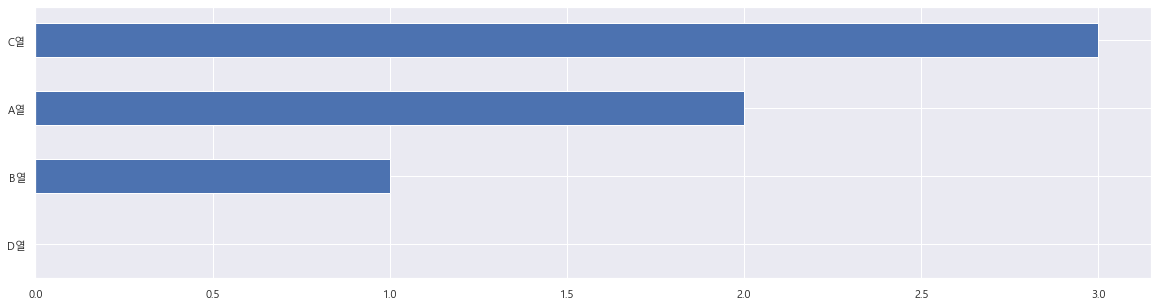

In [82]:
missing_data.isnull().sum().sort_values().plot.barh(figsize = (20,5))

In [83]:
#결측값이 들어가 있는 행 제거, 하나만 있어도 삭제
missing_data.dropna(axis=0)

,A열,B열,C열,D열
1,4.0,a,3.5,0
4,5.0,b,5.5,1


In [84]:
missing_data.dropna(axis=1)

,D열
0,1
1,0
2,1
3,0
4,1
5,1


In [85]:
#thresh 파라미터 이용, 결측값의 개수가 n개 미만 족재하는 경우 결측값 삭제
missing_data.dropna(thresh=5,axis=1)

,B열,D열
0,a,1
1,a,0
2,NaN,1
3,b,0
4,b,1
5,b,1


In [86]:
#특정 열을 대상으로 결측값이 존재하는 raw 제거
missing_data[missing_data['B열'].notnull()]

,A열,B열,C열,D열
0,NaN,a,NaN,1
1,4.0,a,3.5,0
3,5.0,b,NaN,0
4,5.0,b,5.5,1
5,NaN,b,NaN,1


In [87]:
#결측값 확인
missing_data

,A열,B열,C열,D열
0,NaN,a,NaN,1
1,4.0,a,3.5,0
2,6.0,NaN,-1.5,1
3,5.0,b,NaN,0
4,5.0,b,5.5,1
5,NaN,b,NaN,1


In [88]:
missing_data['A열'].fillna(0)
#missing_data['A열'] = missing_data['A열'].fillna(0)
#주석 삭제시 값이 업데이트됨

0    0.0
1    4.0
2    6.0
3    5.0
4    5.0
5    0.0
Name: A열, dtype: float64

In [89]:
## 이전값으로 채우기
missing_data['B열'].fillna(method='ffill')

0    a
1    a
2    a
3    b
4    b
5    b
Name: B열, dtype: object

In [90]:
#이후 값으로 채우기
missing_data['C열'].fillna(method='bfill').head

<bound method NDFrame.head of 0    3.5
1    3.5
2   -1.5
3    5.5
4    5.5
5    NaN
Name: C열, dtype: float64>

In [91]:
#결측값을 속성별 평균으로 대체하기
missing_data.fillna(missing_data.mean())
#missing_data.where(pd.notnull(missing_data), missing_data,min(), axis='columns')

C:\Users\user\AppData\Local\Temp\ipykernel_4140\951572961.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  missing_data.fillna(missing_data.mean())


,A열,B열,C열,D열
0,5.0,a,2.5,1
1,4.0,a,3.5,0
2,6.0,NaN,-1.5,1
3,5.0,b,2.5,0
4,5.0,b,5.5,1
5,5.0,b,2.5,1


In [102]:
df= missing_data.copy()

imputer=SimpleImputer(strategy="most_frequent")
#startegy(most_frequent:최빈값,mean:평균,median:중앙)

df['A열'] = imputer.fit_transform(missing_data[["A열"]])

In [103]:
df

,A열,B열,C열,D열
0,5.0,a,NaN,1
1,4.0,a,3.5,0
2,6.0,NaN,-1.5,1
3,5.0,b,NaN,0
4,5.0,b,5.5,1
5,5.0,b,NaN,1


In [104]:
df = pd.DataFrame(imputer.fit_transform(df))

In [105]:
df

,0,1,2,3
0,5.0,a,-1.5,1
1,4.0,a,3.5,0
2,6.0,b,-1.5,1
3,5.0,b,-1.5,0
4,5.0,b,5.5,1
5,5.0,b,-1.5,1


In [107]:
data=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data", header=None, names=['sex','length','diameter'
                                                                                                                     ,'height','whole_weight',
                                                                                                                     'shucked_weight','viscera_weight'
                                                                                                                     ,'shell_weight','rings'])
df_missing =data.copy()[:20]

In [108]:
df_missing.loc[0:4,'whole_weight']=np.nan

In [110]:
df_missing.head(10)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,NaN,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,NaN,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,NaN,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,NaN,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [112]:
X=df_missing.dropna(axis=0)[['diameter','height','shell_weight']]
y=df_missing.dropna(axis=0)['whole_weight']

In [113]:
X.head()

,diameter,height,shell_weight
5,0.300,0.095,0.120
6,0.415,0.150,0.330
7,0.425,0.125,0.260
8,0.370,0.125,0.165
9,0.440,0.150,0.320


In [114]:
y.head()

5    0.3515
6    0.7775
7    0.7680
8    0.5095
9    0.8945
Name: whole_weight, dtype: float64

In [116]:
lin_reg = linear_model.LinearRegression()
lin_reg_model = lin_reg.fit(X,y)
y_pred = lin_reg_model.predict(df_missing.loc[:,['diameter','height','shell_weight']])

y_pred

array([0.49254286, 0.18873668, 0.68747377, 0.50646044, 0.14810905,
       0.31971105, 0.81030386, 0.7493438 , 0.52804836, 0.85355676,
       0.6024405 , 0.44821428, 0.5794571 , 0.65250514, 0.51008432,
       0.67516872, 0.26825093, 0.41836777, 0.2830785 , 0.35896888])

In [117]:
df_missing['whole_weight'].fillna(pd.Series(y_pred.flatten()), inplace=True)

df_missing

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.492543,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.188737,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.687474,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.506460,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.148109,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.351500,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.777500,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.768000,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.509500,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.894500,0.3145,0.1510,0.320,19


<h1>실습 3</h1>

In [119]:
import random

import scipy.stats as stats
%matplotlib inline
import seaborn as sns

sns.set(font=font_family, rc={"axes.unicode_minus":False})

In [128]:
#3000개의 랜덤 데이터 생성
np_data = np.random.randint(1,100,size=3000)

data = list(np_data)

In [129]:
data[0:2]

[27, 31]

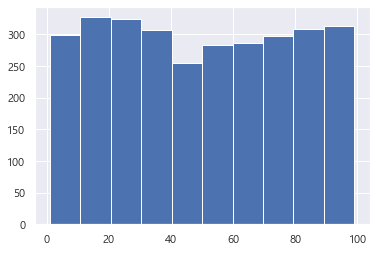

In [130]:
plt.hist(data)
plt.show()

49.678
28.89782545452166


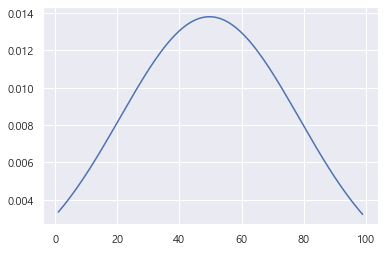

In [131]:
data_mean = np.mean(data)
data_std = np.std(data)
print(data_mean)
print(data_std)

pdf = stats.norm.pdf(np.sort(data), data_mean, data_std)
plt.figure()
plt.plot(np.sort(data), pdf)

9.592326932761352e-17
9.592326932761352e-17


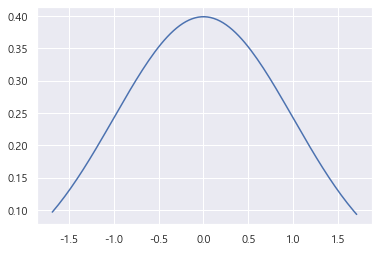

In [133]:
std_list=[]

for i in data:
    z=(i-data_mean)/data_std
    std_list.append(z)
ol_data_mean = np.mean(std_list)
ol_data_std = np.std(std_list)

print(ol_data_mean)
print(ol_data_mean)

ol_pdf = stats.norm.pdf(np.sort(std_list),ol_data_mean,ol_data_std)
plt.figure()
plt.plot(np.sort(std_list), ol_pdf)

49.93355481727575
29.3011101065511


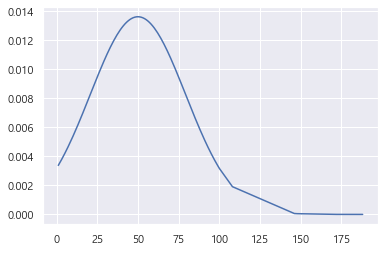

In [135]:
#이상값 추가
ol_data = data.copy()
ol_no = 10

for i in range(ol_no):
    rand_no = random.randint(0,len(data))
    ol_data.insert(rand_no, ol_data[rand_no]*2)

ol_data_mean = np.mean(ol_data)
ol_data_std = np.std(ol_data)

print(ol_data_mean)
print(ol_data_std)

ol_pdf = stats.norm.pdf(np.sort(ol_data),ol_data_mean,ol_data_std)

plt.figure()
plt.plot(np.sort(ol_data),ol_pdf)

-4.131062417209885e-17
1.0


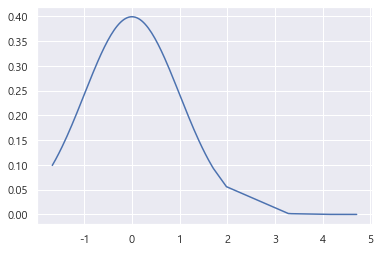

In [138]:
ol_std_list=[]

for i in ol_data:
    z=(i-ol_data_mean)/ol_data_std
    ol_std_list.append(z)

ol_st_data_mean = np.mean(ol_std_list)
ol_st_data_std = np.std(ol_std_list)

print(ol_st_data_mean)
print(ol_st_data_std)

ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list), ol_st_data_mean, ol_st_data_std)
plt.figure()
plt.plot(np.sort(ol_std_list),ol_std_pdf)

In [139]:
len(ol_std_list)

3010

In [140]:
for i in ol_std_list:
    z= i
    if z>2:
        ol_std_list.remove(z)
    if z<-2:
        ol_std_list.remove(z)

In [141]:
len(ol_std_list)

3005

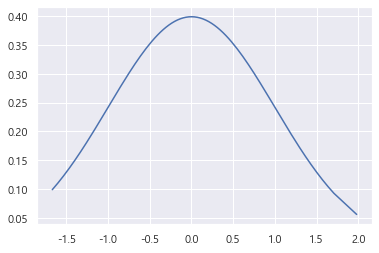

In [144]:
ol_std_pdf=stats.norm.pdf(np.sort(ol_std_list),ol_st_data_mean,ol_st_data_std)

plt.figure()
plt.plot(np.sort(ol_std_list),ol_std_pdf)

In [163]:
#이상값 데이터 생성
boxdata = pd.DataFrame(np.random.randn(100,3),columns=['A열','B열','C열'])

In [164]:
boxdata.head()

,A열,B열,C열
0,0.088583,0.386718,-0.679312
1,-0.519818,-1.643704,1.572012
2,0.898649,-0.006777,-0.543099
3,-0.573437,-1.276647,-0.329815
4,0.960479,-0.274468,-0.441915


In [165]:
boxdata.describe()

,A열,B열,C열
count,100.000000,100.000000,100.000000
mean,0.005631,-0.065629,-0.032801
std,0.924594,1.068217,0.996188
min,-2.609310,-2.768203,-2.946007
25%,-0.580055,-0.788535,-0.607256
50%,0.000618,-0.058436,0.068309
75%,0.649530,0.674529,0.476166
max,2.175314,3.137572,2.626220


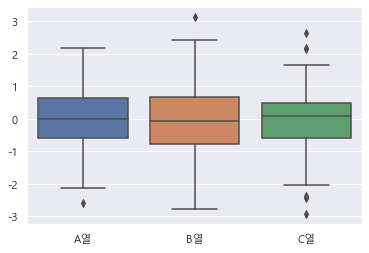

In [166]:
sns.boxplot(data = boxdata)
plt.show()

In [167]:
#이상값 확인
def get_outlier(df=None, column=None, weight=1.5):
    quantile_25 = np.percentile(df[column].values,25)
    quantile_75 = np.percentile(df[column].values,75)
    
    IQR = quantile_75-quantile_25
    IQR_weight = IQR*weight
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 - IQR_weight
    
    outlier_idx = df[column][(df[column]<lowest)|(df[column]>highest)].index
    return outlier_idx

In [168]:
outlier_idx = get_outlier(df=boxdata,column='B열',weight=1.5)

In [169]:
outlier_idx

Int64Index([ 0,  2,  3,  4,  6,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20,
            21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
            38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
            55, 56, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
            74, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91,
            92, 93, 95, 96, 97, 98, 99],
           dtype='int64')

In [170]:
boxdata.drop(outlier_idx, axis=0,inplace=True)

In [171]:
boxdata.shape

(8, 3)

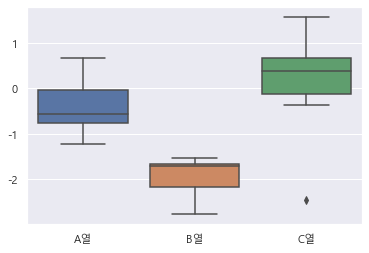

In [172]:
sns.boxplot(data = boxdata)
plt.show()

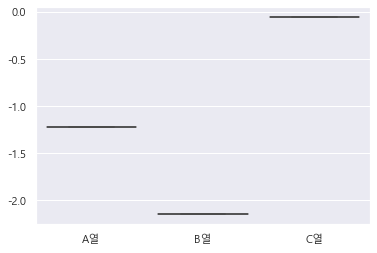

In [173]:
outlier_idx = get_outlier(df=boxdata,column='A열',weight=1.5)
outlier_idx

boxdata.drop(outlier_idx, axis=0, inplace=True)

boxdata.shape

sns.boxplot(data=boxdata)
plt.show()

In [175]:
boxdata.shape

(1, 3)

<h1>실습 4</h1>

In [177]:
from sklearn.datasets import load_iris
iris = load_iris()
#print(iris.DESCR) 아이리스 상세 정보

In [178]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [179]:
# 데이터 생성 및 준비
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy

cols = iris.feature_names

df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [180]:
from sklearn.feature_selection import VarianceThreshold

In [182]:
selector  = VarianceThreshold()

selector.fit(df[cols])

print(selector.variances_)

[0.68112222 0.18871289 3.09550267 0.57713289]


In [184]:
#set threshold
selector.set_params(threshold = 0.6)
#refit and transform
v_sel = selector.fit_transform(df[cols])
#분산 확인
print(selector.variances_)

#분산이 임계치보다 낮은 feature 확인(T: 높음, F:낮음)
print(selector.get_support())

[0.68112222 0.18871289 3.09550267 0.57713289]
[ True False  True False]


In [187]:
iris_sel_df = df.iloc[:,[0,2]]
iris_sel_df.head()

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [188]:
iris_sel_df = pd.concat([iris_sel_df,df[['species']]], axis=1)
iris_sel_df.head()

,sepal length (cm),petal length (cm),species
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa


In [190]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [191]:
cor = df.corr()
cor

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


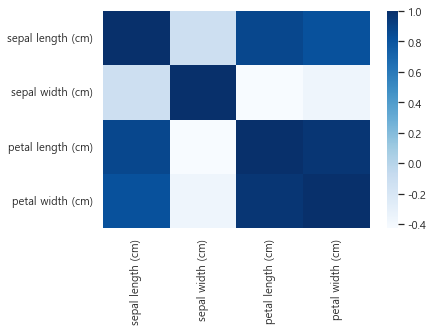

In [192]:
sns.heatmap(cor,annot=False, cmap = plt.cm.Blues)
plt.show()

In [194]:
cor_target = abs(cor['sepal length (cm)'])
print(cor_target)

sepal length (cm)    1.000000
sepal width (cm)     0.117570
petal length (cm)    0.871754
petal width (cm)     0.817941
Name: sepal length (cm), dtype: float64


In [195]:
cor_target[cor_target>0.6]

sepal length (cm)    1.000000
petal length (cm)    0.871754
petal width (cm)     0.817941
Name: sepal length (cm), dtype: float64

In [196]:
selected_cols = cor_target[cor_target > 0.6]
print("상관관계 계수 > 0.6인 속성")
print(selected_cols)

상관관계 계수 > 0.6인 속성
sepal length (cm)    1.000000
petal length (cm)    0.871754
petal width (cm)     0.817941
Name: sepal length (cm), dtype: float64


In [197]:
selected_cols.index 

Index(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'], dtype='object')

In [198]:
df[selected_cols.index].head()

,sepal length (cm),petal length (cm),petal width (cm)
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
